In [39]:
# load csv as pandas dataframe
df = pd.read_csv('ticker_returns_daily_mm.csv')
metadata = pd.read_csv('layoff_metadata.csv')
ticker_metadata = pd.read_csv('ticker_metadata1.csv')
ticker_metadata['ticker'] = ticker_metadata['ticker'].str.upper()

# change df date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df_transposed = df.set_index('date').transpose().reset_index()

# join meta data with ticker data to get ticker symbols
tickers_joined = pd.merge(metadata.set_index('company'), ticker_metadata.set_index('company name'), left_index=True, right_index=True).set_index('ticker').reset_index()

# join ticker metadata with stock data
stocks_data = pd.merge(tickers_joined['layoff_grouping'], df_transposed, left_index=True, right_index=True)

# group layoff vs no layoff groups
layoff_group = stocks_data[stocks_data['layoff_grouping']=='yes'].transpose().drop('layoff_grouping')
no_layoff_group = stocks_data[stocks_data['layoff_grouping']=='no'].transpose().drop('layoff_grouping')


def return_cumulative_return(portfolio_df):

    data = portfolio_df
    data.columns = data.iloc[0]

    # calculate percent change
    monthly_pct_change = data.drop('index').sort_index().pct_change()

    wts = np.empty(data.shape[1])
    wts.fill(1 / data.shape[1])
    weighted_return = (wts * monthly_pct_change)

    # portfolio calculation
    portfolio_return = weighted_return.sum(axis=1)
    cumprod_portfolio = (1 + portfolio_return).cumprod()

    return cumprod_portfolio

def create_return_dataframe():

    layoff_df = pd.DataFrame(return_cumulative_return(layoff_group), columns=['layoff_group'])
    no_layoff_df = pd.DataFrame(return_cumulative_return(no_layoff_group), columns=['no_layoff_group'])

    total_df = pd.merge(layoff_df, no_layoff_df, left_index=True, right_index=True)

    return total_df

create_return_dataframe().to_csv('cumulative_daily_returns.csv', index=True)

In [33]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 8.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 9.1 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


[Text(0.5, 1.0, 'Cumulative Return of Layoff Group 2020 - 2022')]

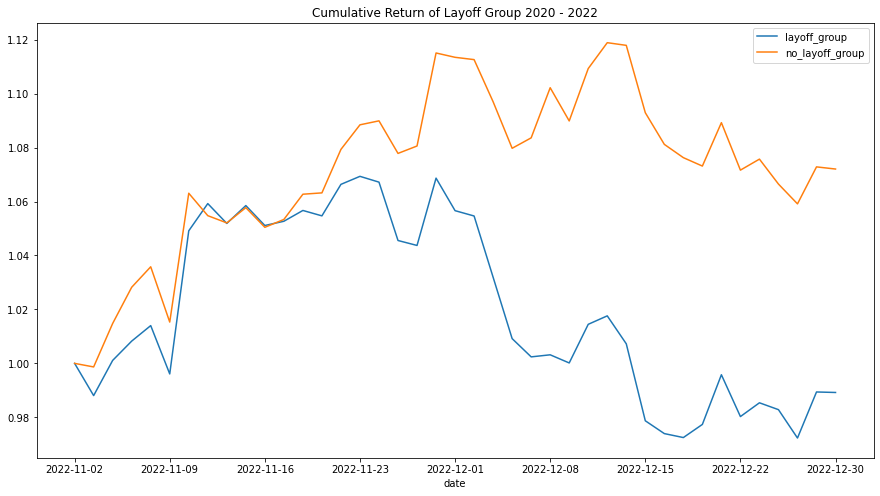

In [40]:
### import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

data = pd.read_csv('cumulative_daily_returns.csv')
data.columns = ['date', 'layoff_group', 'no_layoff_group']

# plot timeseries
data.plot(x = 'date', y=['layoff_group', 'no_layoff_group'], figsize=(15, 8) )
plt.gca().set(title='Cumulative Return of Layoff Group 2020 - 2022')

### Timeseries Analysis
- Stationarity (check using ADF): Data (mean and variance) does not seem to be constant for either groups
- 

In [37]:
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
adfuller(data['layoff_group']) # p > .05, fail to reject null hypothesis. data is not stationary
adfuller(data['no_layoff_group']) # p > .05, fail to reject null hypothesis. data is not stationary

(-1.277160286948382,
 0.6395556654707403,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 -50.87205139542513)